# ER Optimizer Project

In [119]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings

### Import Dataset

In [120]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("rivalytics/er-wait-time")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/er-wait-time


In [121]:
file_path = '/root/.cache/kagglehub/datasets/rivalytics/er-wait-time/versions/1/ER Wait Time Dataset.csv'
data = pd.read_csv(file_path)
display(data.head())

,Visit ID,Patient ID,Hospital ID,Hospital Name,Region,Visit Date,Day of Week,Season,Time of Day,Urgency Level,Nurse-to-Patient Ratio,Specialist Availability,Facility Size (Beds),Time to Registration (min),Time to Triage (min),Time to Medical Professional (min),Total Wait Time (min),Patient Outcome,Patient Satisfaction
0,HOSP-1-20240210-0001,PAT-00001,HOSP-1,Springfield General Hospital,Urban,2024-02-10 20:20:56,Saturday,Winter,Late Morning,Medium,4,3,92,17,22,66,105,Discharged,1
1,HOSP-3-20241128-0001,PAT-00002,HOSP-3,Northside Community Hospital,Rural,2024-11-28 02:07:47,Thursday,Fall,Evening,Medium,4,0,38,9,30,30,69,Discharged,3
2,HOSP-3-20240930-0002,PAT-00003,HOSP-3,Northside Community Hospital,Rural,2024-09-30 04:02:28,Monday,Fall,Evening,Low,5,1,38,38,40,125,203,Discharged,1
3,HOSP-2-20240227-0001,PAT-00004,HOSP-2,Riverside Medical Center,Urban,2024-02-27 00:31:13,Tuesday,Winter,Evening,High,4,5,94,8,16,64,88,Discharged,2
4,HOSP-1-20240306-0002,PAT-00005,HOSP-1,Springfield General Hospital,Urban,2024-03-06 16:52:26,Wednesday,Spring,Afternoon,Low,4,8,74,26,29,63,118,Discharged,1


### Check Missing value

In [122]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 19 columns):
 #   Column                              Non-Null Count  Dtype 
---  ------                              --------------  ----- 
 0   Visit ID                            5000 non-null   object
 1   Patient ID                          5000 non-null   object
 2   Hospital ID                         5000 non-null   object
 3   Hospital Name                       5000 non-null   object
 4   Region                              5000 non-null   object
 5   Visit Date                          5000 non-null   object
 6   Day of Week                         5000 non-null   object
 7   Season                              5000 non-null   object
 8   Time of Day                         5000 non-null   object
 9   Urgency Level                       5000 non-null   object
 10  Nurse-to-Patient Ratio              5000 non-null   int64 
 11  Specialist Availability             5000 non-null   int6

In [123]:
data.describe()

,Nurse-to-Patient Ratio,Specialist Availability,Facility Size (Beds),Time to Registration (min),Time to Triage (min),Time to Medical Professional (min),Total Wait Time (min),Patient Satisfaction
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,3.238200,3.875000,87.118800,11.704200,24.827000,45.385400,81.916600,2.771600
std,1.200895,3.043292,57.998585,10.437284,24.807994,35.619975,68.084538,1.424584
min,1.000000,0.000000,10.000000,0.000000,1.000000,2.000000,4.000000,1.000000
25%,3.000000,1.000000,36.000000,3.000000,6.000000,17.000000,27.000000,1.000000
50%,3.000000,3.000000,74.000000,8.000000,16.000000,35.000000,60.000000,3.000000
75%,4.000000,6.000000,138.000000,18.000000,36.000000,66.000000,122.000000,4.000000
max,5.000000,10.000000,200.000000,66.000000,163.000000,233.000000,442.000000,5.000000


In [124]:
data['Visit Date'] = pd.to_datetime(data['Visit Date'])


In [125]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 19 columns):
 #   Column                              Non-Null Count  Dtype         
---  ------                              --------------  -----         
 0   Visit ID                            5000 non-null   object        
 1   Patient ID                          5000 non-null   object        
 2   Hospital ID                         5000 non-null   object        
 3   Hospital Name                       5000 non-null   object        
 4   Region                              5000 non-null   object        
 5   Visit Date                          5000 non-null   datetime64[ns]
 6   Day of Week                         5000 non-null   object        
 7   Season                              5000 non-null   object        
 8   Time of Day                         5000 non-null   object        
 9   Urgency Level                       5000 non-null   object        
 10  Nurse-to-Patient Ratio  

In [126]:
# Basic integrity checks
print("Shape:", data.shape)        # should be ~ (5000, 20)
print("Missing values:\n", data.isnull().sum())
print("Data types:\n", data.dtypes)
data.head()


Shape: (5000, 19)
Missing values:
 Visit ID                              0
Patient ID                            0
Hospital ID                           0
Hospital Name                         0
Region                                0
Visit Date                            0
Day of Week                           0
Season                                0
Time of Day                           0
Urgency Level                         0
Nurse-to-Patient Ratio                0
Specialist Availability               0
Facility Size (Beds)                  0
Time to Registration (min)            0
Time to Triage (min)                  0
Time to Medical Professional (min)    0
Total Wait Time (min)                 0
Patient Outcome                       0
Patient Satisfaction                  0
dtype: int64
Data types:
 Visit ID                                      object
Patient ID                                    object
Hospital ID                                   object
Hospital Name       

,Visit ID,Patient ID,Hospital ID,Hospital Name,Region,Visit Date,Day of Week,Season,Time of Day,Urgency Level,Nurse-to-Patient Ratio,Specialist Availability,Facility Size (Beds),Time to Registration (min),Time to Triage (min),Time to Medical Professional (min),Total Wait Time (min),Patient Outcome,Patient Satisfaction
0,HOSP-1-20240210-0001,PAT-00001,HOSP-1,Springfield General Hospital,Urban,2024-02-10 20:20:56,Saturday,Winter,Late Morning,Medium,4,3,92,17,22,66,105,Discharged,1
1,HOSP-3-20241128-0001,PAT-00002,HOSP-3,Northside Community Hospital,Rural,2024-11-28 02:07:47,Thursday,Fall,Evening,Medium,4,0,38,9,30,30,69,Discharged,3
2,HOSP-3-20240930-0002,PAT-00003,HOSP-3,Northside Community Hospital,Rural,2024-09-30 04:02:28,Monday,Fall,Evening,Low,5,1,38,38,40,125,203,Discharged,1
3,HOSP-2-20240227-0001,PAT-00004,HOSP-2,Riverside Medical Center,Urban,2024-02-27 00:31:13,Tuesday,Winter,Evening,High,4,5,94,8,16,64,88,Discharged,2
4,HOSP-1-20240306-0002,PAT-00005,HOSP-1,Springfield General Hospital,Urban,2024-03-06 16:52:26,Wednesday,Spring,Afternoon,Low,4,8,74,26,29,63,118,Discharged,1


### Visualize correlations between features

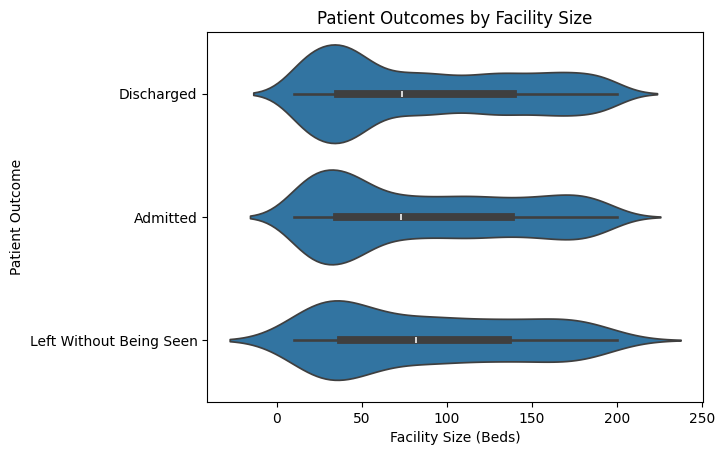

In [127]:
sns.violinplot(x='Facility Size (Beds)', y='Patient Outcome', data=data)
plt.title('Patient Outcomes by Facility Size')
plt.show()

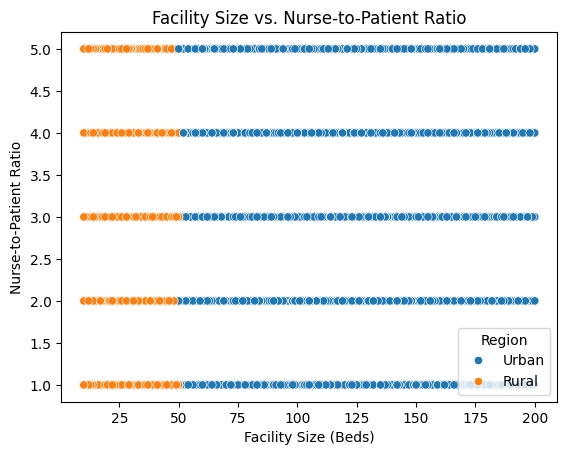

In [128]:
sns.scatterplot(x='Facility Size (Beds)', y='Nurse-to-Patient Ratio', hue='Region', data=data)
plt.title('Facility Size vs. Nurse-to-Patient Ratio')
plt.show()

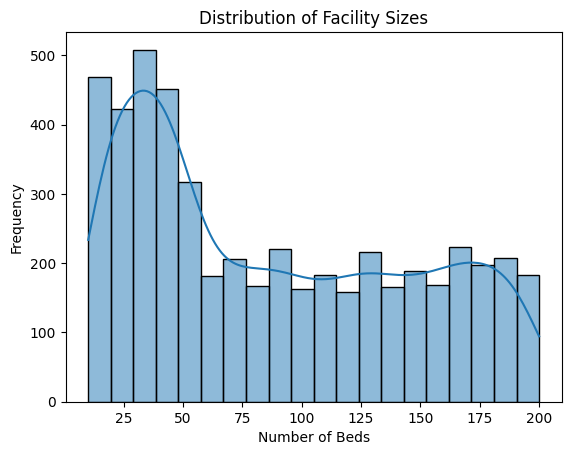

In [129]:
sns.histplot(data['Facility Size (Beds)'], kde=True, bins=20)
plt.title('Distribution of Facility Sizes')
plt.xlabel('Number of Beds')
plt.ylabel('Frequency')
plt.show()

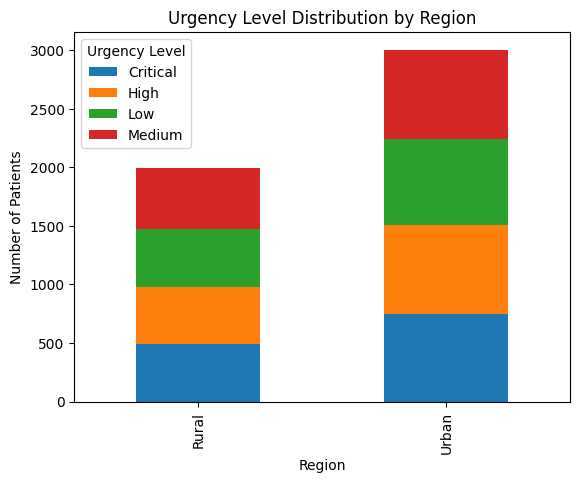

In [130]:
pd.crosstab(data['Region'], data['Urgency Level']).plot(kind='bar', stacked=True)
plt.title('Urgency Level Distribution by Region')
plt.ylabel('Number of Patients')
plt.show()

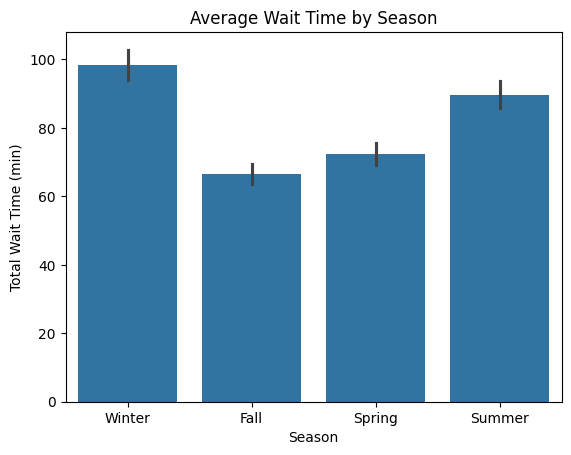

In [131]:
sns.barplot(x='Season', y='Total Wait Time (min)', data=data)
plt.title('Average Wait Time by Season')
plt.show()


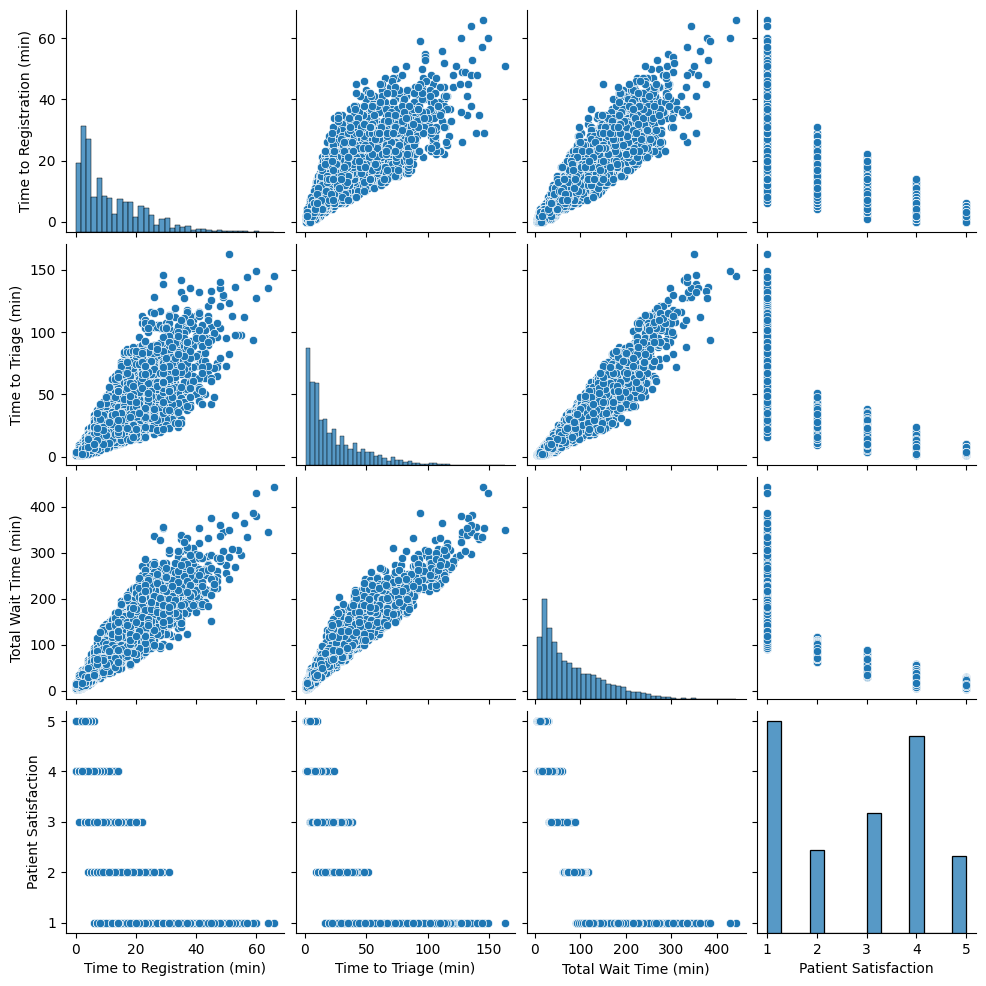

In [132]:
sns.pairplot(data[['Time to Registration (min)', 'Time to Triage (min)',
                 'Total Wait Time (min)', 'Patient Satisfaction']])
plt.show()


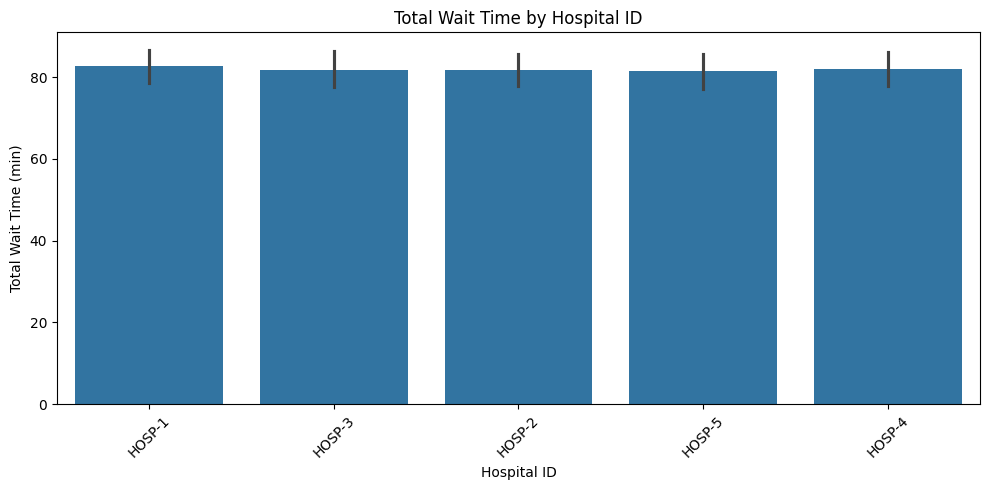

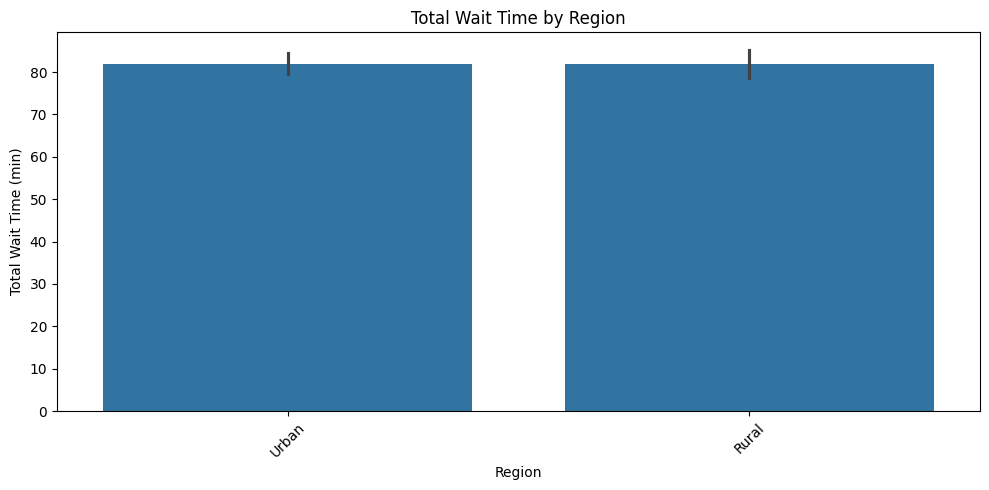

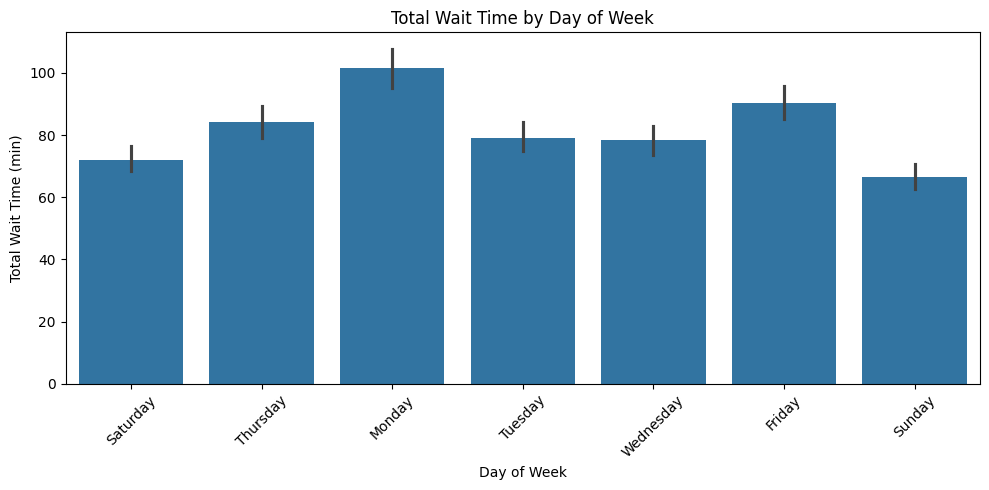

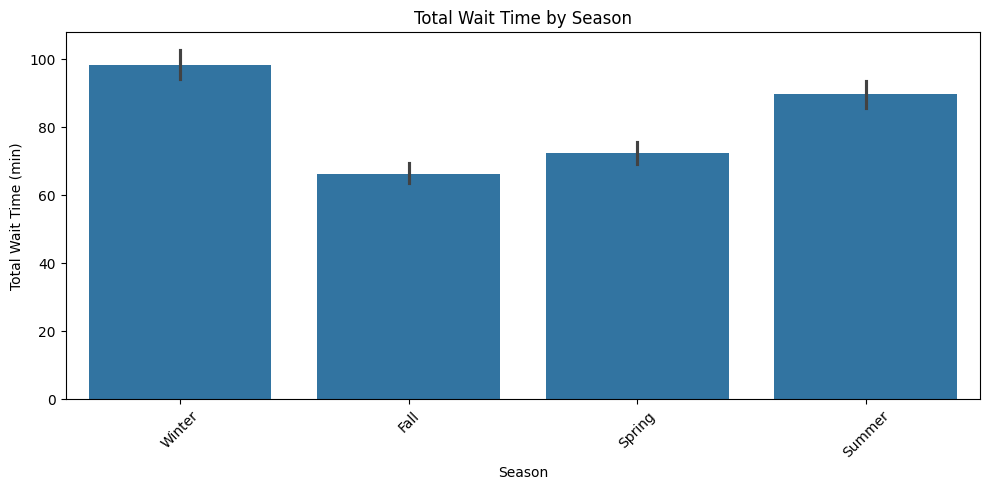

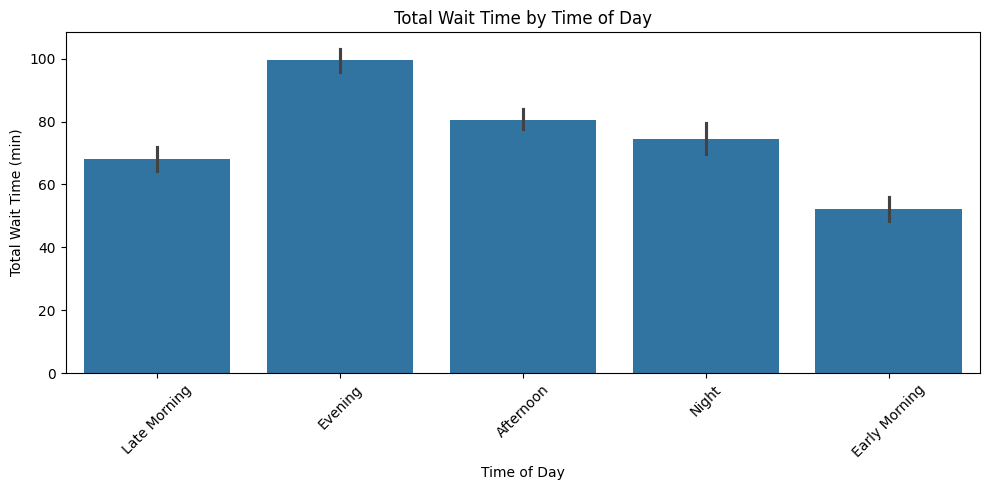

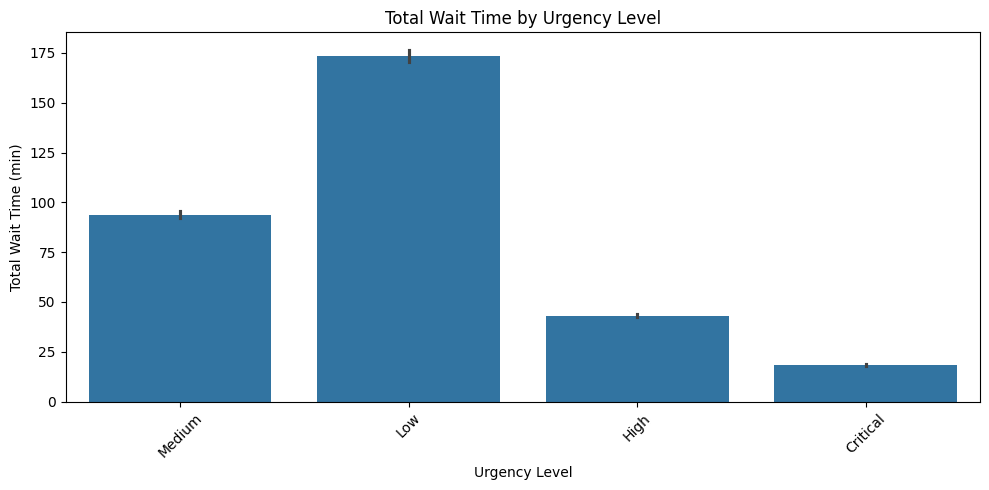

In [133]:
# Boxplots: How different factors affect total wait time
features_to_compare = ['Hospital ID', 'Region', 'Day of Week', 'Season', 'Time of Day', 'Urgency Level']

for feature in features_to_compare:
    plt.figure(figsize=(10, 5))
    sns.barplot(x=feature, y='Total Wait Time (min)', data=data)
    plt.title(f"Total Wait Time by {feature}")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


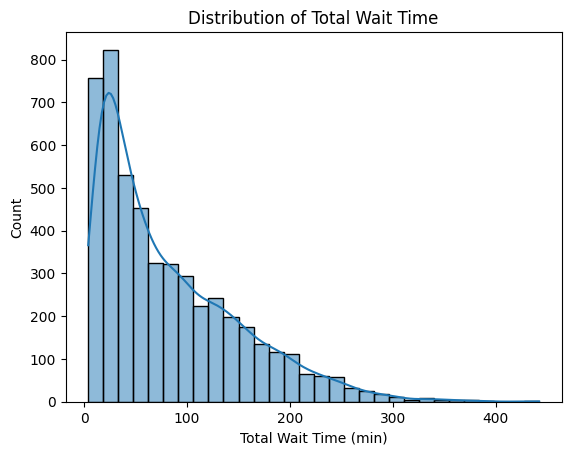

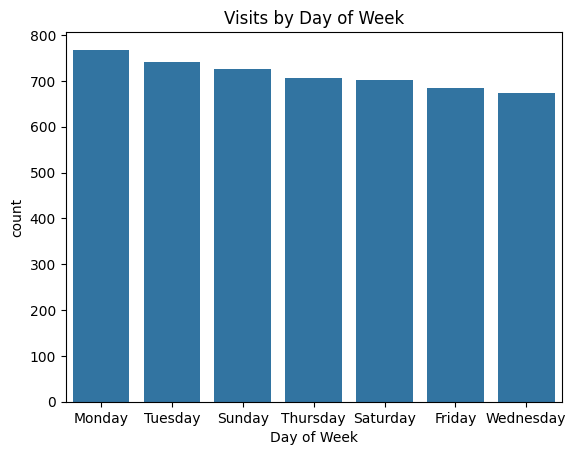

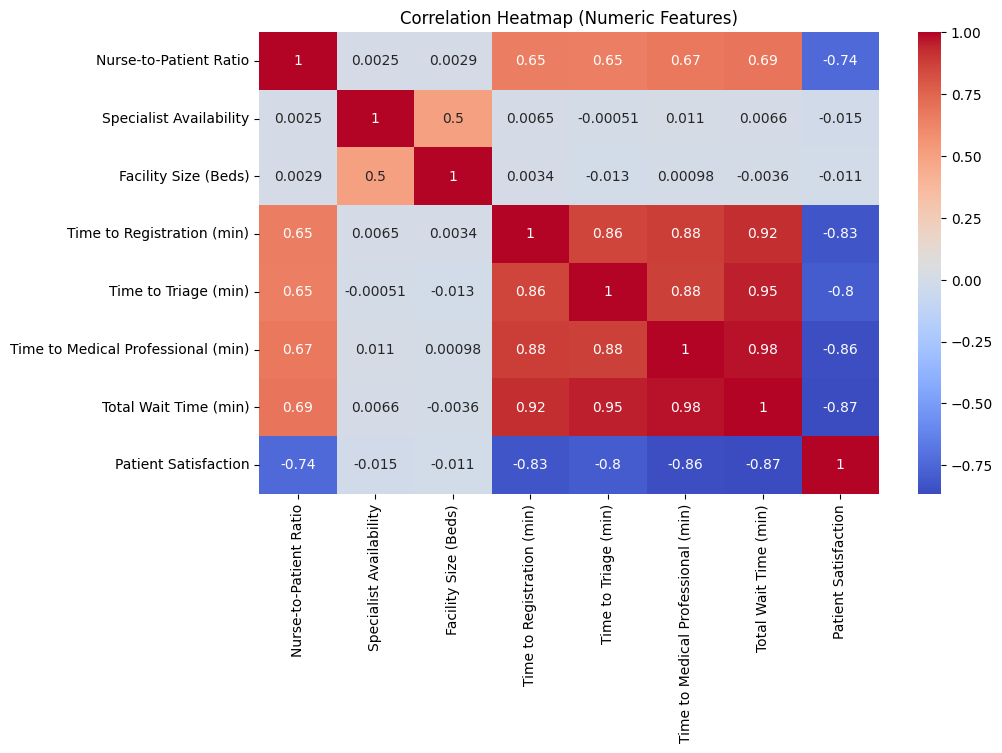

In [134]:
import matplotlib.pyplot as plt
import seaborn as sns

# Distribution of Total Wait Time
sns.histplot(data['Total Wait Time (min)'], bins=30, kde=True)
plt.title("Distribution of Total Wait Time")
plt.show()

# Visits by Day of Week
sns.countplot(x='Day of Week', data=data, order=data['Day of Week'].value_counts().index)
plt.title("Visits by Day of Week")
plt.show()

# Correlation heatmap
plt.figure(figsize=(10,6))
sns.heatmap(data.corr(numeric_only=True), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap (Numeric Features)")
plt.show()


###Encode Categorical Variables

In [135]:
df_encoded = pd.get_dummies(data, columns=['Region','Day of Week','Season','Time of Day','Urgency Level','Patient Outcome'], drop_first=True)


In [136]:
data.head()

,Visit ID,Patient ID,Hospital ID,Hospital Name,Region,Visit Date,Day of Week,Season,Time of Day,Urgency Level,Nurse-to-Patient Ratio,Specialist Availability,Facility Size (Beds),Time to Registration (min),Time to Triage (min),Time to Medical Professional (min),Total Wait Time (min),Patient Outcome,Patient Satisfaction
0,HOSP-1-20240210-0001,PAT-00001,HOSP-1,Springfield General Hospital,Urban,2024-02-10 20:20:56,Saturday,Winter,Late Morning,Medium,4,3,92,17,22,66,105,Discharged,1
1,HOSP-3-20241128-0001,PAT-00002,HOSP-3,Northside Community Hospital,Rural,2024-11-28 02:07:47,Thursday,Fall,Evening,Medium,4,0,38,9,30,30,69,Discharged,3
2,HOSP-3-20240930-0002,PAT-00003,HOSP-3,Northside Community Hospital,Rural,2024-09-30 04:02:28,Monday,Fall,Evening,Low,5,1,38,38,40,125,203,Discharged,1
3,HOSP-2-20240227-0001,PAT-00004,HOSP-2,Riverside Medical Center,Urban,2024-02-27 00:31:13,Tuesday,Winter,Evening,High,4,5,94,8,16,64,88,Discharged,2
4,HOSP-1-20240306-0002,PAT-00005,HOSP-1,Springfield General Hospital,Urban,2024-03-06 16:52:26,Wednesday,Spring,Afternoon,Low,4,8,74,26,29,63,118,Discharged,1


In [137]:

# 1) Drop ID-like columns
data = data.drop(columns=["Visit ID","Patient ID","Hospital Name"], errors="ignore")

# 2) Extract time features
data["Visit Date"] = pd.to_datetime(data["Visit Date"])
data["hour"] = data["Visit Date"].dt.hour
data["weekday_num"] = data["Visit Date"].dt.dayofweek
data["month"] = data["Visit Date"].dt.month


In [138]:
Region_map = {"Urban":0, "Rural":1}
data["Region"] = data["Region"].map(Region_map)

day_map = {"Monday":0, "Tuesday":1, "Wednesday":2, "Thursday":3, "Friday":4, "Saturday":5, "Sunday":6}
data["Day of Week"] = data["Day of Week"].map(day_map)

Season_map = {"Spring":0, "Summer":1, "Fall":2, "Winter":3}
data["Season"] = data["Season"].map(Season_map)

time_map = {"Late Morning":0, "Afternoon":1, "Evening":2, "Night":3 ,"Early Morning":4}
data["Time of Day"] = data["Time of Day"].map(time_map)

Urgency_map = {"Low":0, "Medium":1, "High":2,"Critical":3}
data["Urgency Level"] = data["Urgency Level"].map(Urgency_map)

patient_map = {"Admitted":0, "Discharged":1 ,"Left Without Being Seen":2}
data["Patient Outcome"] = data["Patient Outcome"].map(patient_map)

data.head()

,Hospital ID,Region,Visit Date,Day of Week,Season,Time of Day,Urgency Level,Nurse-to-Patient Ratio,Specialist Availability,Facility Size (Beds),Time to Registration (min),Time to Triage (min),Time to Medical Professional (min),Total Wait Time (min),Patient Outcome,Patient Satisfaction,hour,weekday_num,month
0,HOSP-1,0,2024-02-10 20:20:56,5,3,0,1,4,3,92,17,22,66,105,1,1,20,5,2
1,HOSP-3,1,2024-11-28 02:07:47,3,2,2,1,4,0,38,9,30,30,69,1,3,2,3,11
2,HOSP-3,1,2024-09-30 04:02:28,0,2,2,0,5,1,38,38,40,125,203,1,1,4,0,9
3,HOSP-2,0,2024-02-27 00:31:13,1,3,2,2,4,5,94,8,16,64,88,1,2,0,1,2
4,HOSP-1,0,2024-03-06 16:52:26,2,0,1,0,4,8,74,26,29,63,118,1,1,16,2,3


In [139]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 19 columns):
 #   Column                              Non-Null Count  Dtype         
---  ------                              --------------  -----         
 0   Hospital ID                         5000 non-null   object        
 1   Region                              5000 non-null   int64         
 2   Visit Date                          5000 non-null   datetime64[ns]
 3   Day of Week                         5000 non-null   int64         
 4   Season                              5000 non-null   int64         
 5   Time of Day                         5000 non-null   int64         
 6   Urgency Level                       5000 non-null   int64         
 7   Nurse-to-Patient Ratio              5000 non-null   int64         
 8   Specialist Availability             5000 non-null   int64         
 9   Facility Size (Beds)                5000 non-null   int64         
 10  Time to Registration (mi

###Scaling Numerical Features

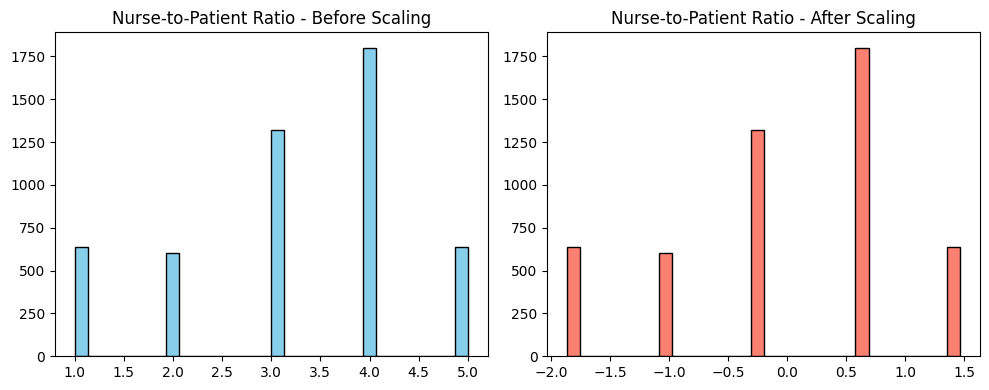

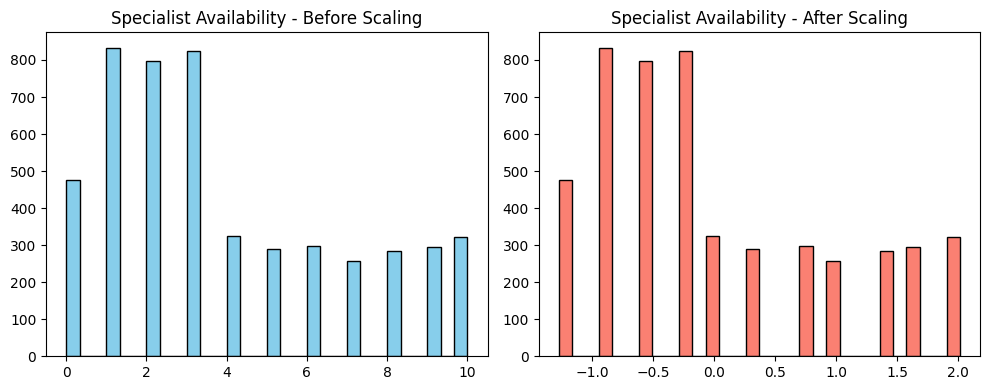

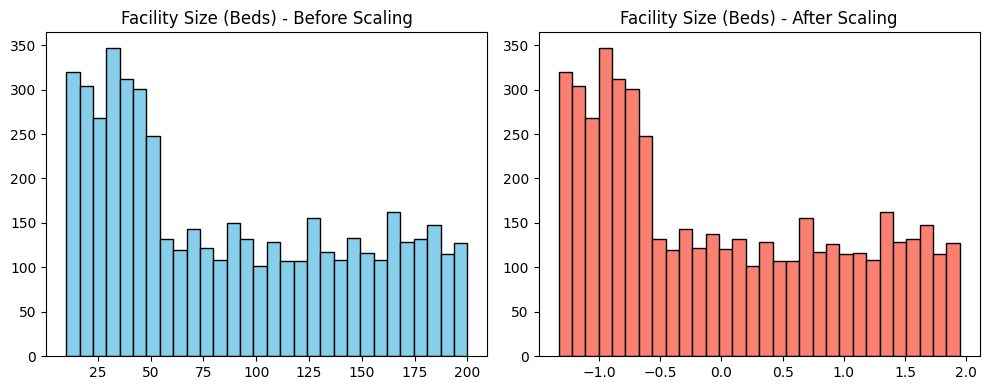

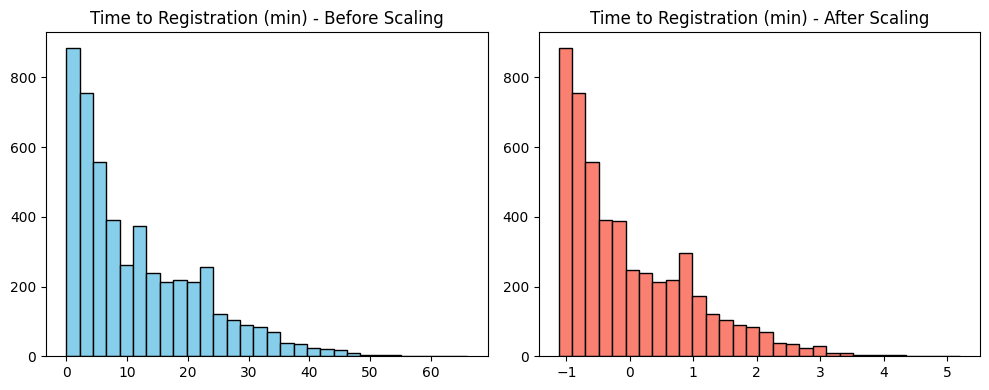

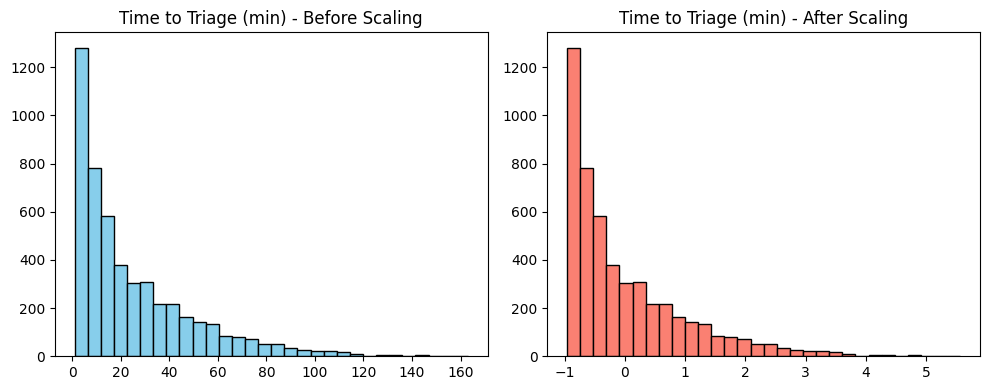

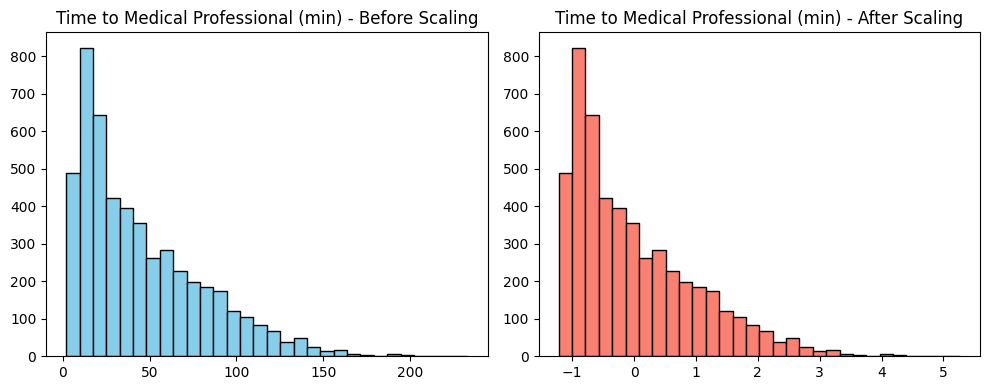

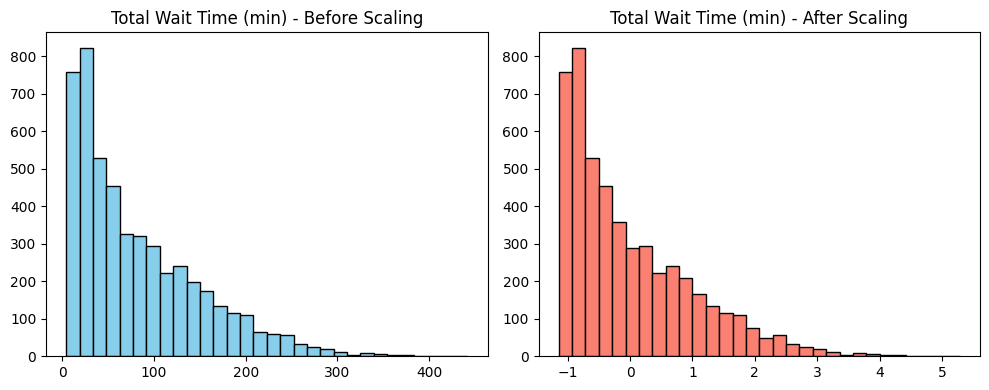

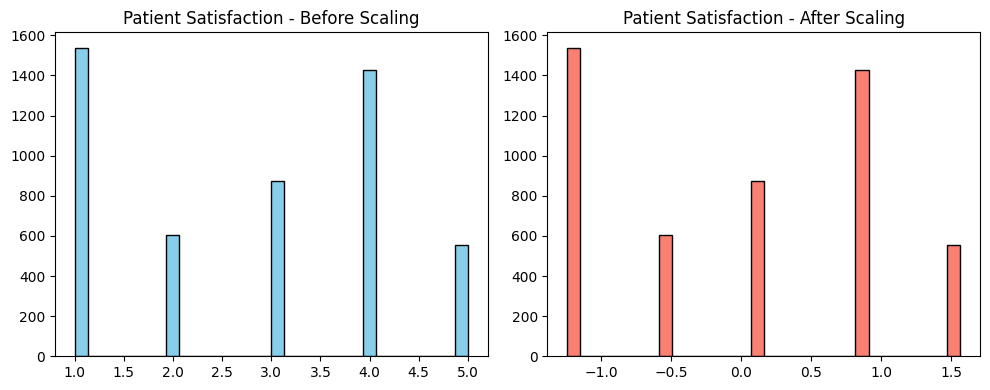

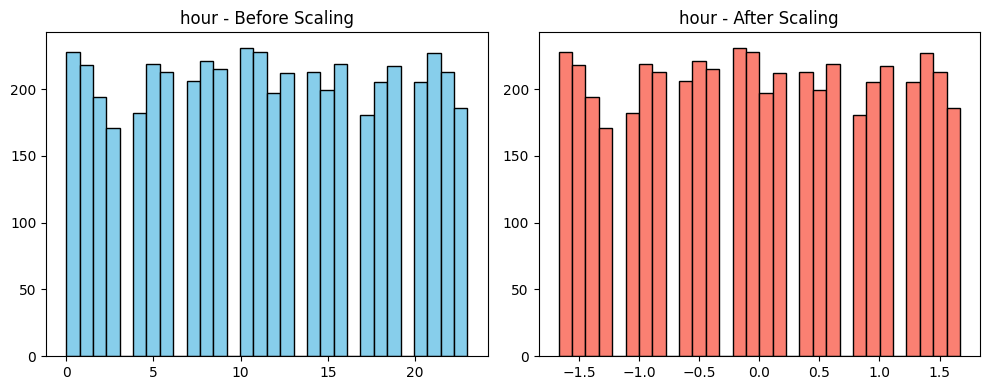

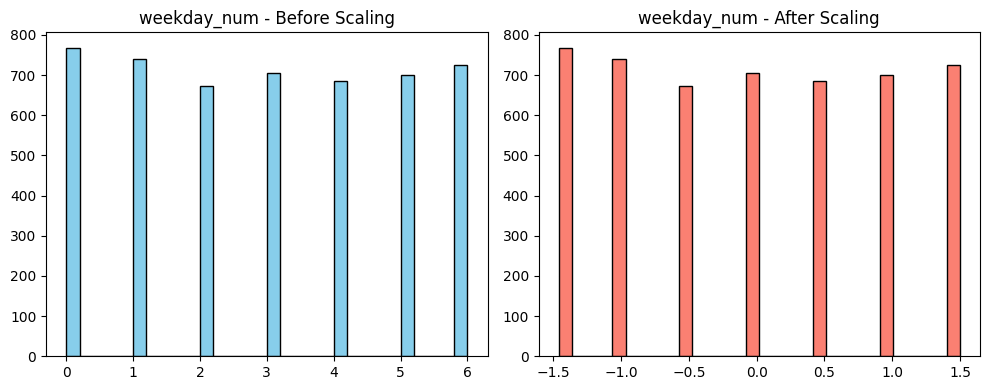

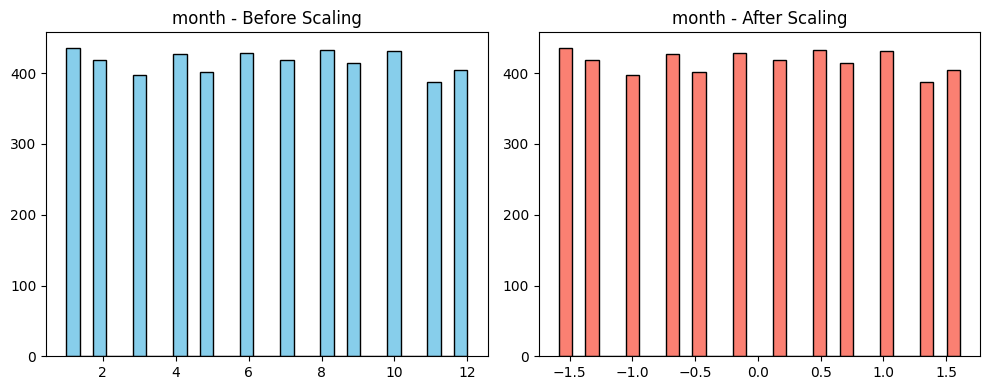

In [140]:
# Numeric columns
num_cols = [
    "Nurse-to-Patient Ratio",
    "Specialist Availability",
    "Facility Size (Beds)",
    "Time to Registration (min)",
    "Time to Triage (min)",
    "Time to Medical Professional (min)",
    "Total Wait Time (min)",
    "Patient Satisfaction",
    "hour",
    "weekday_num",
    "month"
]

# Copy original values
before_scaling = data[num_cols].copy()

# Scale
scaler = StandardScaler()
data[num_cols] = scaler.fit_transform(data[num_cols])
after_scaling = data[num_cols].copy()

# Plot histograms before vs after scaling
for col in num_cols:
    fig, axes = plt.subplots(1, 2, figsize=(10, 4))

    # Before
    axes[0].hist(before_scaling[col], bins=30, color="skyblue", edgecolor="black")
    axes[0].set_title(f"{col} - Before Scaling")

    # After
    axes[1].hist(after_scaling[col], bins=30, color="salmon", edgecolor="black")
    axes[1].set_title(f"{col} - After Scaling")

    plt.tight_layout()
    plt.show()